In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [3]:
data = pd.read_csv("diabetes.csv")

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.shape

(768, 9)

# Showing Correlations of features

In [6]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [7]:
results = []

# # Plotting correlations with heatmap

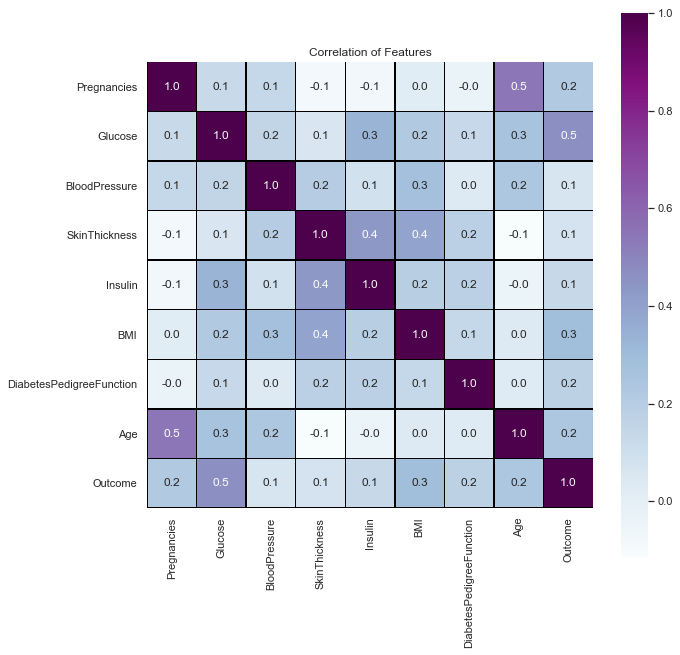

In [8]:
sns.set(font_scale = 1.0)
plt.figure(figsize = (10, 10))
sns.heatmap(data.corr(), vmax = 1, linewidths = 0.4, fmt= '.1f',
            square = True, annot = True, cmap = 'BuPu', linecolor = "black")
plt.title('Correlation of Features');

# # Plotting correlations with pairplot

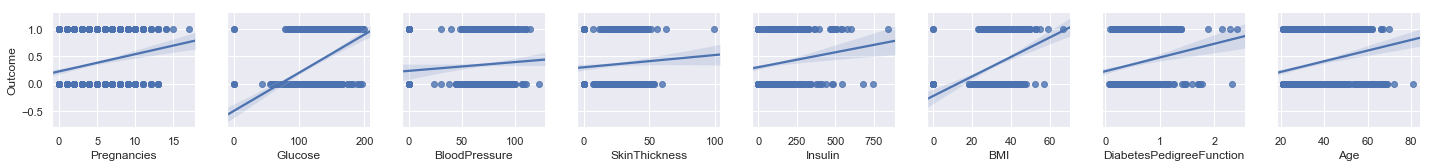

In [9]:
sns.pairplot(data, x_vars=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'], y_vars=['Outcome'], kind='reg')

# Linear Regression

In [10]:
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
label_cols = ['Outcome']
X = data[feature_cols]
Y = data[label_cols]
X = X.fillna(0)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [14]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
result = linreg.fit(X_train, Y_train)
print(result.score(X_train, Y_train))

0.2884964165642533


In [15]:
print(linreg.intercept_)

[-0.80951581]


In [16]:
print(linreg.coef_)

[[ 0.01750959  0.00576999 -0.00243293  0.00066979 -0.00014035  0.0123151
   0.11798977  0.00334331]]


In [17]:
Y_pred = linreg.predict(X_test)

In [18]:
from sklearn import metrics
print(metrics.mean_absolute_error(Y_test, Y_pred))
print(metrics.mean_squared_error(Y_test, Y_pred))
print(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

0.3233194059629176
0.1493801838221556
0.3864973270569353


# Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=22)
logreg = LogisticRegression()
Y_train1 = Y_train['Outcome']
res = logreg.fit(X_train, Y_train1)
print(res.score(X_train, Y_train1))
scores = cross_val_score(logreg, X_train, Y_train1, cv=kfold,scoring = "accuracy")
print(scores.mean())

0.7708333333333334
0.7553539019963703


In [23]:
print(logreg.intercept_)

[-5.25473975]


In [24]:
print(logreg.coef_)

[[ 1.01713277e-01  2.68486920e-02 -1.82893399e-02  3.55218583e-03
  -4.13415310e-04  4.93200668e-02  4.99905223e-01  9.64029889e-03]]


In [25]:
Y_pred = logreg.predict(X_test)

In [26]:
print(metrics.mean_absolute_error(Y_test['Outcome'], Y_pred))

0.21875


In [27]:
print(metrics.mean_squared_error(Y_test['Outcome'], Y_pred))

0.21875


In [28]:
print(np.sqrt(metrics.mean_squared_error(Y_test['Outcome'], Y_pred)))

0.46770717334674267


# Support Vector Machine Classifier

In [29]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold
s = SVC()
Y_train2 = Y_train['Outcome']
kfold = KFold(n_splits=10, random_state=22)
res = s.fit(X_train, Y_train2)
scores = cross_val_score(s, X_train, Y_train2, cv=kfold,scoring = "accuracy")
print(scores.mean())

0.6507259528130671


In [30]:
print(s.intercept_)

[-0.46211253]


In [31]:
Y_pred = s.predict(X_test)

In [32]:
print(metrics.mean_absolute_error(Y_test['Outcome'], Y_pred))

0.3489583333333333


In [33]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,Y_pred))

0.6510416666666666


In [34]:
models = []
models.append(("LR",LogisticRegression()))
models.append(("SVM",SVC()))
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10, random_state=22)
    cv_result = cross_val_score(model,X_train,Y_train, cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

LR 0.7553539019963703
SVM 0.6507259528130671


[Text(0, 0, 'LR'), Text(0, 0, 'SVM')]

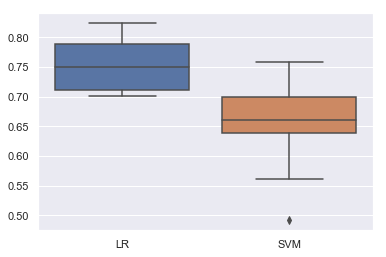

In [35]:
ax = sns.boxplot(data=results)
ax.set_xticklabels(names)